In [1073]:
from PIL import Image, ImageFont, ImageDraw
im = Image.open('./captcha (6).gif') 
%matplotlib inline

In [1075]:
im = Image.open('realcap/captcha (10).gif')

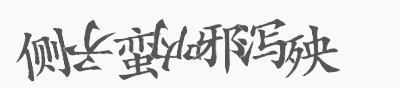

In [1076]:
im

In [888]:
from zheye import util

In [889]:
im = util.centerExtend(im, radius=20)

In [890]:
vec = util.img2vec(im).copy()

In [891]:
util.showAscii(vec[43:73, 42:82])

++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++
++++++++++++  ++++++++++++++++++++++++++
++++++++++++    ++++++++++++++++++++++++
+++++++++++++     ++++++++++++++   +++++
+++++++++++++       ++++++++++++    ++++
++++++++++++++      ++++++++++++      ++
++++++++++++++       +++++++++++       +
+++++++++++++++      ++++++++++        +
+++++++++++++++      +++++++++         +
++++++++++++++++    ++++++++++       +++
+++  ++++++++++++   +++++++++       ++++
+++   ++++++++++++++++++++++            
+++     ++++++++

In [892]:
for i in range(vec.shape[0]):
    for j in range(vec.shape[1]):
        if vec[i][j] >= 249:
            vec[i][j] = 255

In [893]:
im = Image.fromarray(vec, 'L')

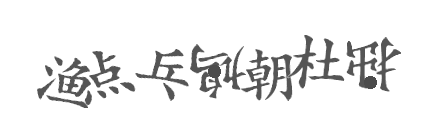

In [894]:
im

In [895]:
Y = []
for i in range(vec.shape[0]):
    for j in range(vec.shape[1]):
        if vec[i][j] <= 200:
            Y.append([i, j])

In [850]:
from sklearn.cluster import KMeans
import numpy as np

# 高斯混合

In [851]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

In [852]:
import time
start_time = time.time()

ini = np.array([[64, 60 ],[64, 100],[64, 140],[64, 180],[64, 220],[64, 260],[64, 300]])

gmm = mixture.GaussianMixture(n_components=7, covariance_type='tied', reg_covar=1e2, tol=1e3, n_init=9)
gmm.fit(Y)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.438653945923 seconds ---


In [853]:
k_means_cluster_centers = gmm.means_

In [854]:
np.sort(k_means_cluster_centers, axis=0)

array([[  61.62383161,   70.84755389],
       [  62.09594931,  103.66042601],
       [  70.98592473,  168.72403431],
       [  71.1832138 ,  214.7398932 ],
       [  74.7165153 ,  270.03631316],
       [  75.59364753,  314.31315215],
       [  82.93172475,  370.36942339]])

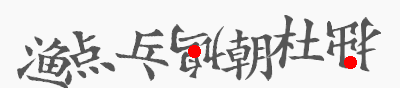

In [863]:
util.PaintPoint(im.convert("RGB"), [[62.93173091,  350.37338027]])

## K means

In [236]:
#ini = np.array([[64, 60 ],[64, 100],[64, 140],[64, 180],[64, 220],[64, 260],[64, 300]])
k_means = KMeans(n_clusters=7, max_iter=500)

In [274]:
k_means = KMeans(init='k-means++', n_clusters=7, algorithm='full')

In [275]:
k_means.fit(Y)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [276]:
import numpy as np
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)

In [277]:
k_means_cluster_centers

array([[  64.19505495,   65.10161443],
       [  64.36327078,  109.80863309],
       [  65.61195929,  166.19460343],
       [  67.74532374,  218.59796438],
       [  71.65903516,  257.18956044],
       [  72.08823529,  296.36327078],
       [  73.71130104,  334.58056266]])

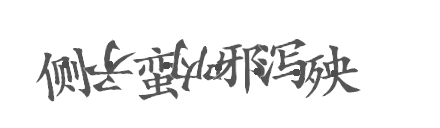

In [278]:
util.PaintPoint(im, k_means_cluster_centers)

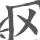

In [85]:
util.crop(im,  k_means_cluster_centers[3][0],   k_means_cluster_centers[3][1], radius=20)

In [141]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras

In [142]:
model = keras.models.load_model('zheye/zheyeV3.keras')

In [143]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

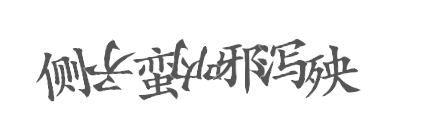

In [144]:
im

In [147]:
import time
start_time = time.time()


a = [[0]*5 for i in range(5) ]
#A = 0.0
for i in range(5):
    for j in range(5):
        x = -2 + i + k_means_cluster_centers[3][0]
        y = -2 + j + k_means_cluster_centers[3][1]

        cr = util.crop(im, x, y, radius=20)
        cr = cr.resize((40, 40), Image.ANTIALIAS)

        #X = np.asarray(cr.convert('1'), dtype='float')
        X = np.asarray(cr.convert('L'), dtype='float')

        #X = X.ravel()
        '''
        for (x,y), value in np.ndenumerate(X):
            if value > 150:
                X[x][y] = 0.5
            else:
                X[x][y] = -0.5
        '''
        X = (X.astype(float)- 200) /256


        #xx = X.astype('uint8')*255
        #mm = Image.fromarray(xx)
        #plt.imshow(mm, cmap='hot')
        #plt.show()

        #X = (255 - X )/200;
        x0 = np.expand_dims(X, axis=0)
        x1 = np.expand_dims(x0, axis=3)
        m_y = model.predict(x1)
        
        
        '''
        if m_y[0][0] < 0.5:
            a[i][j] = 0
        else:
            a[i][j] = 1
        '''
        a[i][j] = m_y[0][0]
        #A += m_y[0][0]

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0953190326691 seconds ---


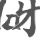

In [148]:
cr

In [149]:
np.array(a)

array([[ 0.54223478,  0.70628339,  0.69735086,  0.67200774,  0.57765627],
       [ 0.80496013,  0.72190195,  0.83672428,  0.74838883,  0.53910643],
       [ 0.75616139,  0.75484926,  0.75898433,  0.73870456,  0.66361529],
       [ 0.75237983,  0.79805255,  0.85866153,  0.82644552,  0.61268479],
       [ 0.56097418,  0.666839  ,  0.68315315,  0.59928071,  0.68251562]], dtype=float32)

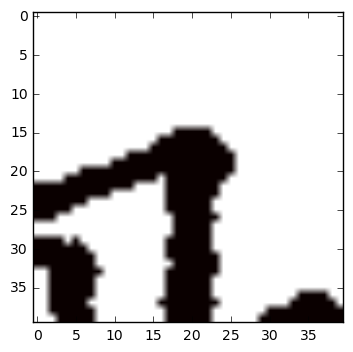

[ 0.99033046  0.00966949]


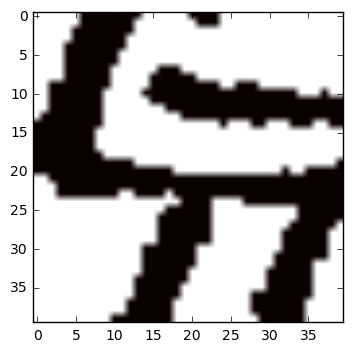

[ 0.6667698   0.33323026]


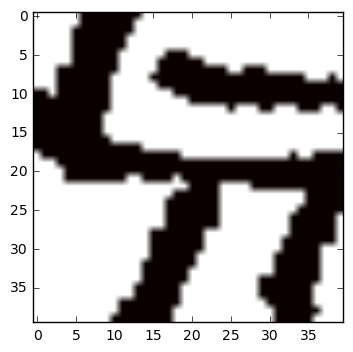

[ 0.0199237   0.98007625]


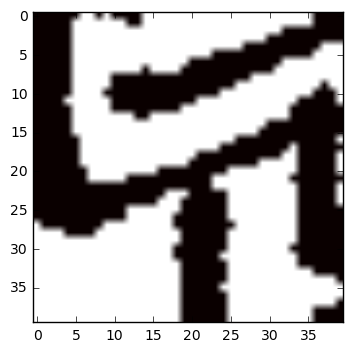

[ 0.07764284  0.9223572 ]


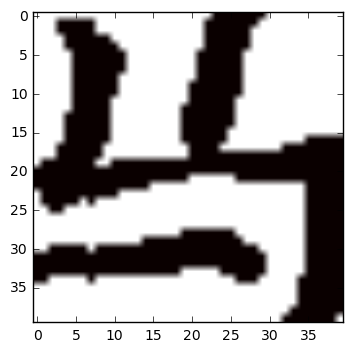

[  1.93953718e-04   9.99806106e-01]


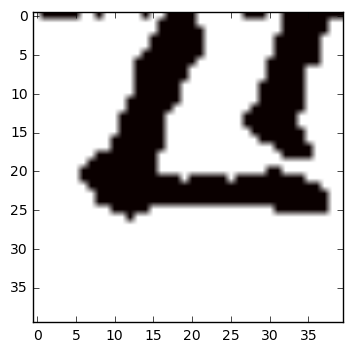

[  5.80885429e-09   1.00000000e+00]


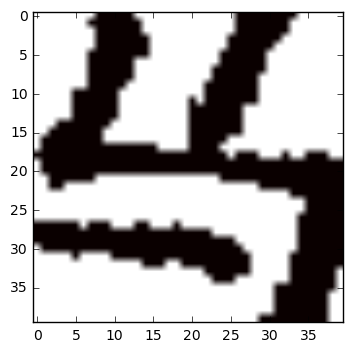

[  1.14476802e-06   9.99998808e-01]


In [281]:
plt.ion()
for i in range(7):
    x = k_means_cluster_centers[i][0]
    y = k_means_cluster_centers[i][1]
    
    cr = util.crop(im, x, y, radius=20)
    cr = cr.resize((40, 40), Image.ANTIALIAS)
    
    #X = np.asarray(cr.convert('1'), dtype='float')
    X = np.asarray(cr.convert('L'), dtype='float')
    
    #X = X.ravel()
    for (x,y), value in np.ndenumerate(X):
        if value > 200:
            X[x][y] = 1.0
        else:
            X[x][y] = 0.0
    
    
    xx = X.astype('uint8')*255
    mm = Image.fromarray(xx)
    plt.imshow(mm, cmap='hot')
    plt.show()
    
    #X = (255 - X )/200;
    x0 = np.expand_dims(X, axis=0)
    x1 = np.expand_dims(x0, axis=3)
    m_y = model.predict(x1)
    print(m_y[0])

In [253]:
sum([sum(i) for i in a])

190

In [254]:
'''
plt.ion()
for i in range(7):
    x = k_means_cluster_centers[i][0]
    y = k_means_cluster_centers[i][1]
    
    cr = util.crop(im, x, y, radius=25)
    X = np.asarray(cr.convert('1'), dtype='float')

    xx = X.astype('uint8')*255
    mm = Image.fromarray(xx)
    plt.imshow(mm, cmap='hot')
    plt.show()
    
    #X = (255 - X )/200;
    x0 = np.expand_dims(X, axis=0)
    x1 = np.expand_dims(x0, axis=3)
    m_y = model.predict(x1)
    print(m_y[0][0])
'''
a = 1

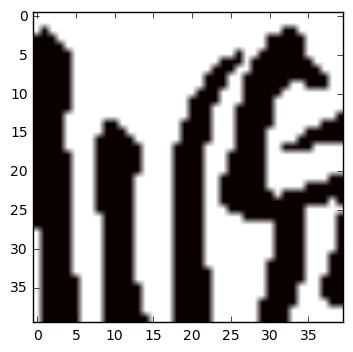

[  9.99999762e-01   2.97337579e-07]


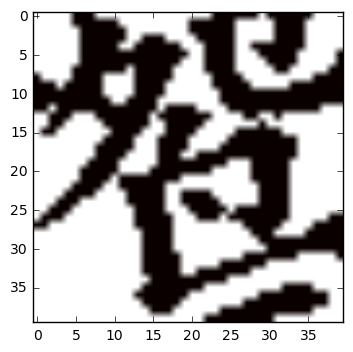

[ 0.91123497  0.08876503]


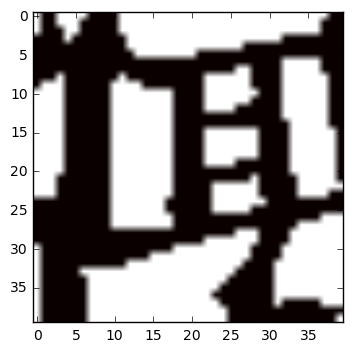

[  7.10390964e-08   9.99999881e-01]


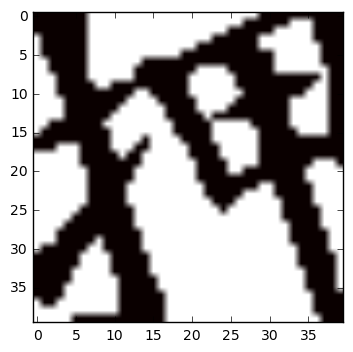

[ 0.96363741  0.03636267]


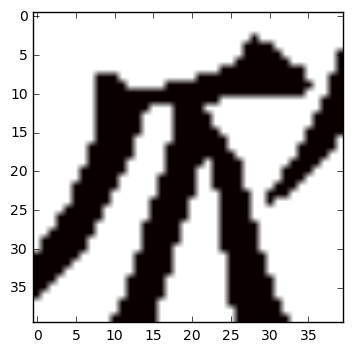

[  1.00000000e+00   1.20129586e-08]


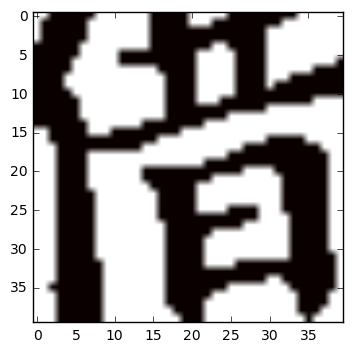

[  1.00000000e+00   1.19980976e-08]


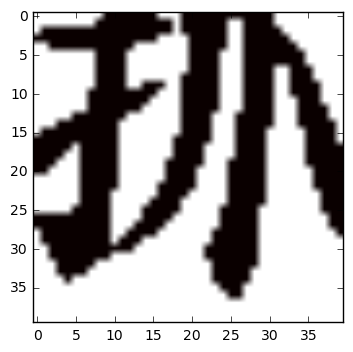

[  3.47174534e-07   9.99999642e-01]


In [255]:
plt.ion()
for i in range(7):
    x = k_means_cluster_centers[i][0]
    y = k_means_cluster_centers[i][1]
    
    cr = util.crop(im, x, y, radius=20)
    cr = cr.resize((40, 40), Image.ANTIALIAS)
    
    #X = np.asarray(cr.convert('1'), dtype='float')
    X = np.asarray(cr.convert('L'), dtype='float')
    
    #X = X.ravel()
    for (x,y), value in np.ndenumerate(X):
        if value > 200:
            X[x][y] = 1.0
        else:
            X[x][y] = 0.0
    
    
    xx = X.astype('uint8')*255
    mm = Image.fromarray(xx)
    plt.imshow(mm, cmap='hot')
    plt.show()
    
    #X = (255 - X )/200;
    x0 = np.expand_dims(X, axis=0)
    x1 = np.expand_dims(x0, axis=3)
    m_y = model.predict(x1)
    print(m_y[0])

In [1]:
from zheye import zheye
z = zheye()
z.Recognize('./realcap/captcha-3.gif')